<a href="https://colab.research.google.com/github/jeric250/Data-Science-Projects/blob/main/Behaviour_of_Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a four-part series analysing the behaviour of linear models such as logistic regression, support vector machine (SVM) and linear regression on the following:
1. Imbalanced dataset
2. Dataset with features on different scale and dimension
3. Dataset with outliers
4. Dataset with collinear features

While in practice, more complicated models such as Random Forest and XGBoost are used more often, linear models which are simpler and more intuitive can serve as a baseline when building ML models. Thus, having a strong understanding of linear models is essential.

This is partly inspired by the course work from the Applied Roots's [Applied Machine Learning course](https://www.appliedaicourse.com/course/11/Applied-Machine-learning-course).

<h3>Part 1: Linear models on imbalanced datasets</h3>

1. Observe how linear models (linear SVM and logistic regression) work in case of imbalanced, linearly separable data.
2. Observe how the hyperplane changes according to change in regularization strength.
3. There are 4 datasets - in the 1st dataset, the ratio between positive and negative class is 100:2, 100:20 for 2nd dataset, 100:40 for 3rd dataset, and 100:80 for 4th dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

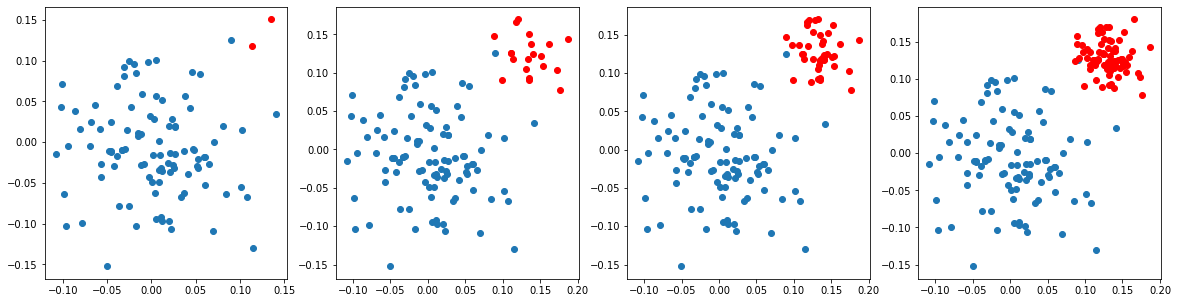

In [ ]:
# create 4 imbalanced datasets, save to list and create scatterplot for each set of data
ratios = [(100,2), (100, 20), (100, 40), (100, 80)] # ratio of positive, negative class for each of the 4 datasets
X_list = []
y_list = []
X_p_list = []
X_n_list = []

plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1) # arg: (no. of row, no. of cols, index)
    np.random.seed(25)
    X_p=np.random.normal(0,0.05,size=(i[0],2)) # create array for x positive drawn randomly from normal dist(mean 0, std deviation 0.05), with size of 100x2
    np.random.seed(25)
    X_n=np.random.normal(0.13,0.02,size=(i[1],2)) # create array for x negative drawn randomly from normal dist(mean 0.13, std deviation 0.02), with size of 2/20/40/80x2
    y_p=np.array([1]*i[0]).reshape(-1,1) # create array for y positive, with size of 100x1
    y_n=np.array([0]*i[1]).reshape(-1,1) # create array for y negative, with size of 2/20/40/80x1
    X=np.vstack((X_p,X_n)) # stack x positive and x negative vertically (height)
    y=np.vstack((y_p,y_n)) # stack y positive and y negative vertically (height)
    plt.scatter(X_p[:,0],X_p[:,1]) # only plot x positive
    plt.scatter(X_n[:,0],X_n[:,1],color='red') # only plot x negative in red
    
    X_list.append(X) # save created dataset to list for future reference
    y_list.append(y)
    X_p_list.append(X_p)
    X_n_list.append(X_n)

plt.show()
# for X_list, y_list, X_p_list, X_n_list: index 0 refers to dataset with positive:negative points ratio of 100:2, index 1 refers to dataset with p:n points ratio of 100:20, and so on

In [ ]:
# define function for applying linear SVC and plotting separating hyperplane
# reference: https://stackoverflow.com/questions/47342494/python-how-to-use-logistic-regression-coefficients-to-construct-decision-bounda
# https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/
# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html
# https://stackoverflow.com/questions/65584316/how-to-plot-decision-boundaries-of-svm-with-different-kernels-3-classes-3-fea

def svm_plot(X_list, y_list, X_p_list, X_n_list, ratios, c):
  '''
  1. For given X positive and X negative, create scatter plot for each dataset (note: X_list, y_list, X_p_list, X_n_list are lists containing the imbalanced dataset array)
  2. Apply linear SVC on X and y for a given C (hyperparameter), and plot hyperplane
  '''
  plt.figure(figsize=(20,5))
  for i in range(len(X_list)): # for each dataset saved to the list (index 0 refers to 100:2 dataset, index 1 refers to 100:20 dataset and so on):
    # plot X positive and X negative
    plt.subplot(1, 4, i+1) # create subplot of 1 row, 4 cols for corresponding index
    plt.scatter(X_p_list[i][:,0],X_p_list[i][:,1],color='blue') # plot X positive in blue
    plt.scatter(X_n_list[i][:,0],X_n_list[i][:,1],color='red') # plot X negative in red
    plt.title('Positive, negative class ratio:' + str(ratios[i]))
    
    # run SVM
    clf = SVC(kernel='linear',C=c, random_state=40) # initialize SVC
    clf.fit(X_list[i],y_list[i])
    coefficient = clf.coef_[0] # need [0] as coef output is in double braces
    intercept = clf.intercept_
    margin = 1 / (np.sqrt(np.sum(clf.coef_ ** 2)))
    
    # plot hyperplane
    draw_line(coefficient,intercept,min(X_list[i][:,1]),max(X_list[i][:,1]))
    # intercept for parallel hyperplane is (intercept +/- 1)
    draw_line(coefficient,intercept - margin * np.sqrt(np.sum(clf.coef_ ** 2)) ,min(X_list[i][:,1]),max(X_list[i][:,1]))
    draw_line(coefficient,intercept + margin * np.sqrt(np.sum(clf.coef_ ** 2)) ,min(X_list[i][:,1]),max(X_list[i][:,1]))
    plt.scatter(X_list[i][clf.support_][:,0],X_list[i][clf.support_][:,1],facecolors='none',edgecolors='k')
  
  plt.suptitle('SVM Hyperplane With C = ' + str(c),fontweight='bold')
  plt.show()

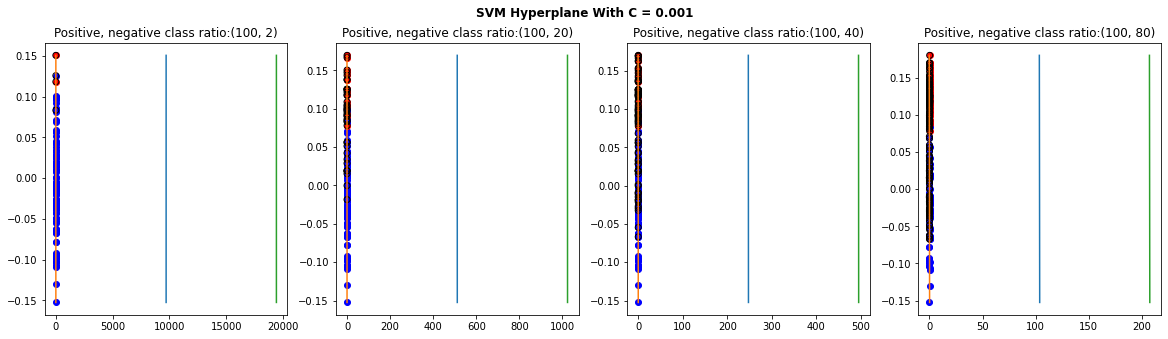

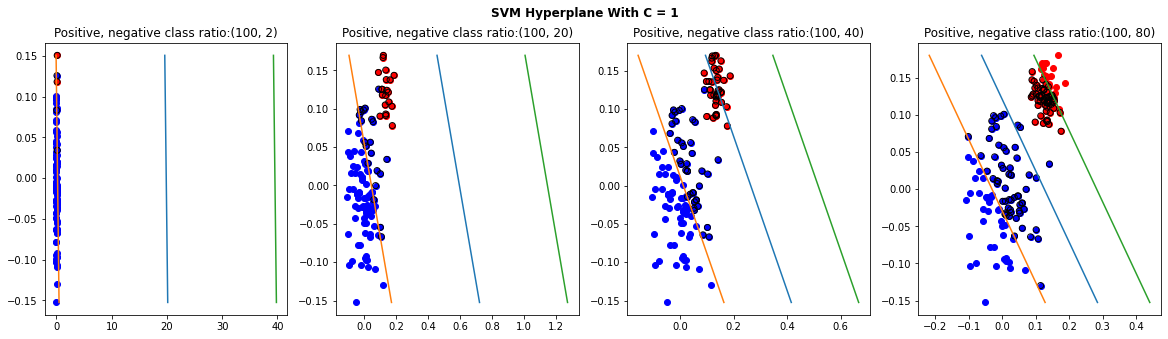

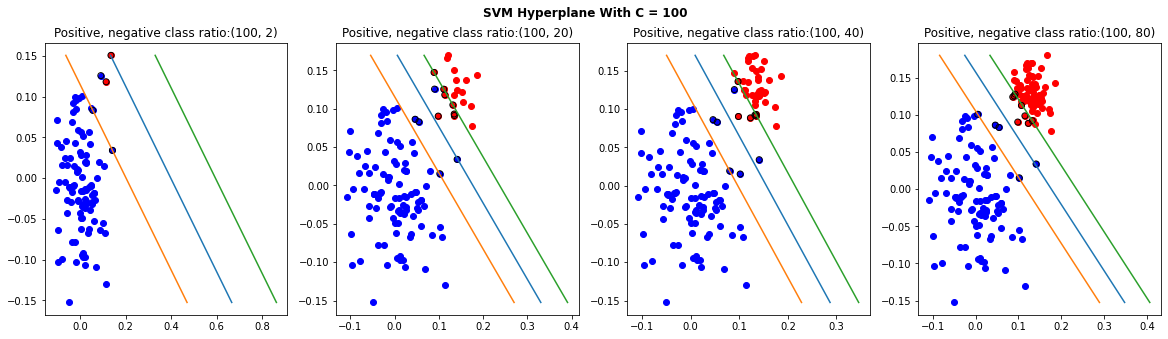

In [ ]:
svm_plot(X_list, y_list, X_p_list, X_n_list, ratios, 0.001)
svm_plot(X_list, y_list, X_p_list, X_n_list, ratios, 1)
svm_plot(X_list, y_list, X_p_list, X_n_list, ratios, 100)

>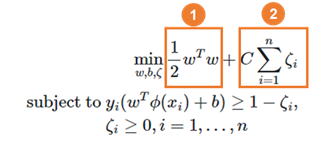
<br>SVM (soft margin) solves the above primal problem, where we are trying to maximize the margin distance (first component of the equation) while incurring a misclassification penalty (second component of the equation). As data may not be perfectly separable, some data points can be at ${\xi_{i}}$ distance from their correct margin boundary. C controls the strength of the misclassification penalty, and acts as an inverse regularization parameter. Observations on plots above:
1. With a large C (weak regularization), a stronger emphasis is placed on minimizing the average distance of misclassified points to the correct margin boundary. This means classifying the data points correctly becomes more important (i.e. hinge loss minimization has more emphasis), leading to a higher tendency for the model to overfit. Margin maximization also becomes less important. For the plots with C=100, we can see the hyperplane allowed for overall better separation between the 2 classes, with overall smaller distance of misclassified points to the margin boundary, when compared to smaller C. This suggests that the model is optimal at C=100. An exception is with the severely imbalanced dataset (100:2), where the hyperplane does not separate the 2 classes. In addition, the distance between the margins for C=100 is smaller compared to smaller C.
2. With a small C (strong regularization), a stronger emphasis is placed on maximizing the margin distance. This means classifying the data points correctly becomes less important, leading to a higher tendency for the model to underfit. For the plots with C=0.001, we can see the hyperplane resulted in large margin distance, when compared to higher C. Even for the dataset with class ratio of 100:80, the hyperplane does not separate the classes well. It is likely that the model is underfitting for C=0.001 as there is poor separation of classes.
3. Generally, with imbalanced data, SVM is biased towards predicting the majority class as this minimizes the hinge loss. From the plots above, if the data is not too severely imbalanced (e.g. class ratio of 100:80), a non-trivial value of C (e.g. 1<C<=100) can produce a hyperplane that reasonably seperates the 2 classes.

References: 
1. [sklearn SVM mathematical formulation](https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation)
2. [Medium: SVM article](https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72)

In [ ]:
# define function for applying logistic regression and plotting separating hyperplane
# reference: https://stackoverflow.com/questions/47342494/python-how-to-use-logistic-regression-coefficients-to-construct-decision-bounda
# https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/
# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html
# https://stackoverflow.com/questions/65584316/how-to-plot-decision-boundaries-of-svm-with-different-kernels-3-classes-3-fea

def log_reg_plot(X_list, y_list, X_p_list, X_n_list, ratios, c):
  '''
  1. For given X positive and X negative, create scatter plot for each dataset (note: X_list, y_list, X_p_list, X_n_list are lists containing the imbalanced dataset array)
  2. Apply logistic regression on X and y for a given C (hyperparameter), and plot hyperplane
  '''
  plt.figure(figsize=(20,5))
  for i in range(len(X_list)): # for each dataset saved to the list (index 0 refers to 100:2 dataset, index 1 refers to 100:20 dataset and so on):
    # plot X positive and X negative
    plt.subplot(1, 4, i+1) # create subplot of 1 row, 4 cols for corresponding index
    plt.scatter(X_p_list[i][:,0],X_p_list[i][:,1],color='blue') # plot X positive in blue
    plt.scatter(X_n_list[i][:,0],X_n_list[i][:,1],color='red') # plot X negative in red
    plt.title('Positive, negative class ratio:' + str(ratios[i]))
    
    # run logistic regression
    clf = LogisticRegression(C=c, random_state=40) # initialize logistic regression
    clf.fit(X_list[i],y_list[i])
    coefficient = clf.coef_[0] # need [0] as coef output is in double braces
    intercept = clf.intercept_

    # plot hyperplane
    draw_line(coefficient,intercept,min(X_list[i][:,1]),max(X_list[i][:,1]))

  plt.suptitle('Logistic Regression With C = ' + str(c),fontweight='bold')
  plt.show()

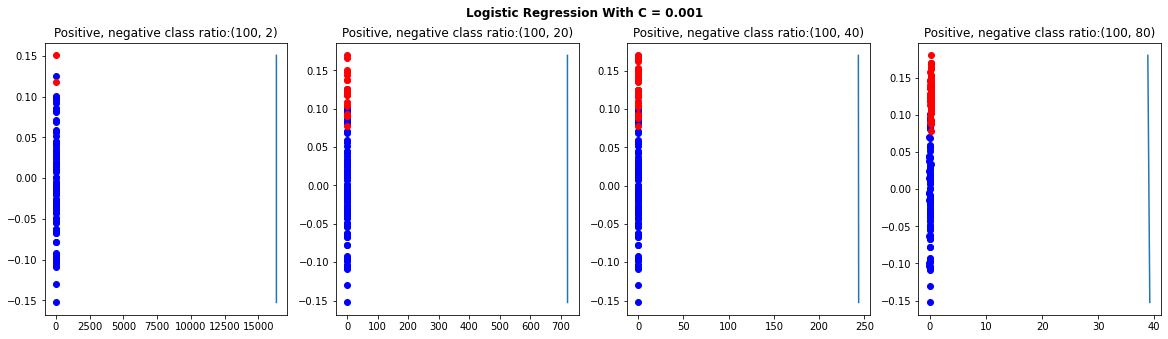

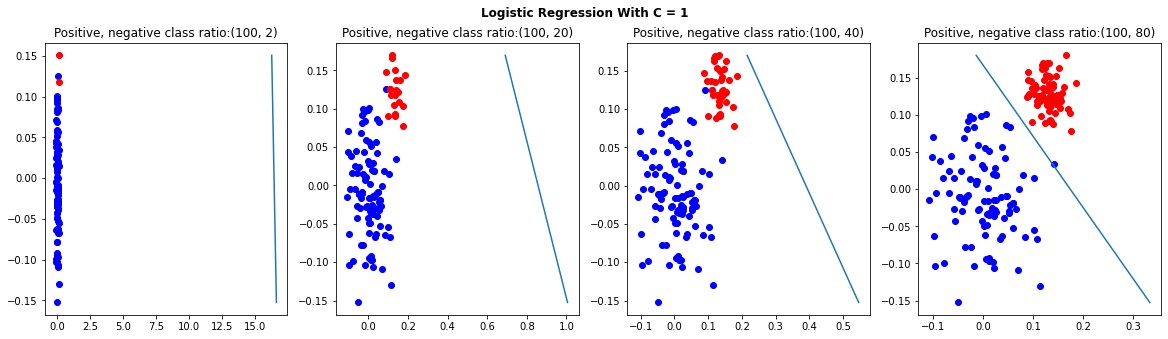

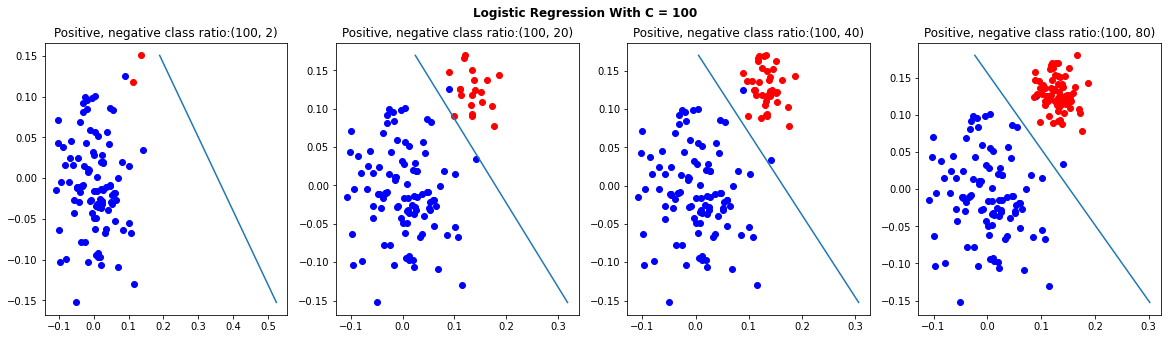

In [ ]:
log_reg_plot(X_list, y_list, X_p_list, X_n_list, ratios, 0.001)
log_reg_plot(X_list, y_list, X_p_list, X_n_list, ratios, 1)
log_reg_plot(X_list, y_list, X_p_list, X_n_list, ratios, 100)

>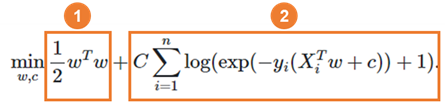
<br>Logistic regression (with L2 regularization) solves the above optimization problem, where the first component is the regularization term, and the second component is the loss term, and we aim to minimize both terms. The objective of logistic regression is to find an optimal hyperplane that separates the classes, in which we are trying to maximize the sum of the signed distances ($y_iw^Tx_i$), where a positive $y_iw^Tx_i$ implies a correctly classified point. This means the signed distance tends to infinity where all points are correctly classified. Thus, the minimum value of the loss term is 0 when the signed distance approaches infinity. Without  the regularization term, there is a tendency to overfit when solving the optimization problem. Thus, C controls the strength of the loss term, and acts an inverse regularization parameter. Observations on plots above:
1. With a large C (weak regularization), a stronger emphasis is placed on minimizing the loss term. In other words, maximizing the sum of signed distance and classifying the data points correctly becomes more important, leading to a higher tendency for the model to overfit. For the plots with C=100, we can see the hyperplane allowed for overall better separation between the 2 classes, when compared to smaller C. This suggests that the model is optimal at C=100, at least for dataset without severe class imbalance. The exception is with the severely imbalanced dataset (100:2), where the hyperplane does not separate the 2 classes. 
2. With a small C (strong regularization), a stronger emphasis is placed on the regularization component. This means large coefficients are penalized, and classifying the data points correctly becomes less important, leading to a higher tendency for the model to underfit. For the plots with C=0.001, we can see the hyperplane produced fail to seperate the classes, even for dataset with class ratio of 100:80. This is due to the model not learning from the data sufficiently as the emphasis on classifiying the data points correctly is weakened by strong regularization. It is likely the model is underfitting at C=0.001.
3. Generally, with imbalanced data, logistic regression is biased towards predicting the majority class as this minimizes the logistic loss. From the plots above, if the data is not too severely imbalanced (e.g. class ratio of 100:80), a non-trivial value of C (e.g. 1<C<=100) can produce a hyperplane that reasonably separates the 2 classes.

References: 
1. [sklearn logistic regression mathematical formulation](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
2. [Towards Data Science article](https://towardsdatascience.com/the-basics-logistic-regression-and-regularization-828b0d2d206c)
3. [Medium article](https://medium.com/@aditya97p/l1-and-l2-regularization-237438a9caa6)


<h3>Part 2: Linear models on features with different variance</h3>

1. Observe how linear models work in the case of data having features with different levels of variance (different scale/dimension).
2. Apply logistic regression, linear SVM on data and check feature importance.
3. Apply logistic regression, linear SVM on standardized data and check feature importance.

In [ ]:
import numpy as np
import pandas as pd
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/task_b.csv')
data=data.iloc[:,1:]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      200 non-null    float64
 1   f2      200 non-null    float64
 2   f3      200 non-null    float64
 3   y       200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.head() # features has different scale

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [ ]:
data.corr()['y'] # f3 has a strong positive correlation with y

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [ ]:
data.std() # var(F2)>>var(F1)>>var(F3)

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [ ]:
X=data[['f1','f2','f3']].values
Y=data['y'].values
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


Logistic Regression (Unstandardized Data)

In [ ]:
clf = SGDClassifier(loss='log', random_state=30).fit(X,Y)

In [ ]:
# ref: https://stackoverflow.com/questions/51462979/how-to-get-feature-importance-in-logistic-regression-using-weights
# get index of weights by desc order
weights = clf.coef_[0]
abs_weights = np.abs(weights)
sorted_index = np.argsort(abs_weights)[::-1] # [::-1] reverses the array returned by argsort() to desc order

# check feature importance
for p,q in zip(np.array(data.columns)[sorted_index], abs_weights[sorted_index]): # generate tuples for each element
  print('{:5}:{}'.format(p,q))

f2   :12647.404666685186
f1   :11021.367427056182
f3   :10918.440345377905


>f2 is the most important feature as it has the highest variance. In reality, f3 has a strong positive correlation with y, which should make f3 the most important feature. However, this is skewed by f2's scale/dimension, which is much larger than f3. Logistic regression tries to find a separating plane that maximizes the distance from different classes. Thus, for distance-based models like logistic regression, when a feature (like f2) has very large values, it will dominate over other features when calculating the distance. Thus, a feature like f2 will appear more important.

Linear SVM (Unstandardized Data)

In [ ]:
clf = SGDClassifier(loss='hinge', random_state=30).fit(X,Y)

In [ ]:
# get index of weights by desc order
weights = clf.coef_[0]
abs_weights = np.abs(weights)
sorted_index = np.argsort(abs_weights)[::-1] # [::-1] reverses the array returned by argsort() to desc order

# check feature importance
for p,q in zip(np.array(data.columns)[sorted_index], abs_weights[sorted_index]): # generate tuples for each element
  print('{:5}:{}'.format(p,q))

f2   :13289.999002874356
f1   :13093.248949616804
f3   :10792.632260466618


>Similar to the result from logistic regression above, f2 is the most important feature as it has the highest variance. In reality, f3 has a strong positive correlation with y, which should make f3 the most important feature. However, this is skewed by f2's scale/dimension, which is much larger than f3. Support vector machine tries to maximize the distance between the separating plane and the support vectors. Thus, for distance-based models like SVM, when a feature (like f2) has very large values, it will dominate over other features when calculating the distance. Thus, a feature like f2 will appear more important.

Logistic Regression (Standardized Data)

In [ ]:
# apply standardization
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

print(X_scaled.shape)
print(X_scaled.mean())
print(X_scaled.std())

(200, 3)
-9.473903143468003e-17
1.0


In [ ]:
clf = SGDClassifier(loss='log', random_state=30).fit(X_scaled,Y)

In [ ]:
# get index of weights by desc order
weights = clf.coef_[0]
abs_weights = np.abs(weights)
sorted_index = np.argsort(abs_weights)[::-1] # [::-1] reverses the array returned by argsort() to desc order

# check feature importance
for p,q in zip(np.array(data.columns)[sorted_index], abs_weights[sorted_index]): # generate tuples for each element
  print('{:5}:{}'.format(p,q))

f3   :10.743932628467727
f1   :1.529952579058662
f2   :0.8491525046072982


> As established above, if a feature has very large values, it will dominate over other features when calculating the distance for distance-based models like logistic regression and SVM. Standardization is essential as it ensures all features have the same influence on the distance metric. After fitting logistic regression on the standardized data, f3 is now the most important feature as expected.

Linear SVM (Standardized Data)

In [ ]:
clf = SGDClassifier(loss='hinge', random_state=30).fit(X_scaled,Y)

In [ ]:
# get index of weights by desc order
weights = clf.coef_[0]
abs_weights = np.abs(weights)
sorted_index = np.argsort(abs_weights)[::-1] # [::-1] reverses the array returned by argsort() to desc order

# check feature importance
for p,q in zip(np.array(data.columns)[sorted_index], abs_weights[sorted_index]): # generate tuples for each element
  print('{:5}:{}'.format(p,q))

f3   :13.52130922766332
f2   :2.354249934455865
f1   :1.4160431232662338


> As established above, if a feature has very large values, it will dominate over other features when calculating the distance for distance-based models like logistic regression and SVM. Standardization is essential as it ensures all features have the same influence on the distance metric. After fitting SVM on the standardized data, f3 is now the most important feature as expected. In fact, the weight for f3 is much larger than for f2 and f1.

<h3>Part 3: Outlier Effect on Linear Regression</h3>

1. Visualize best fit linear regression lines with different regularization strengths on dataset with outliers.
2. Observe how regularization helps to make models more robust to outliers.

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [ ]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

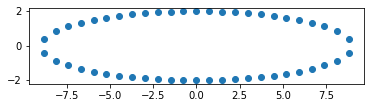

In [ ]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [ ]:
# set up datasets for X and Y
X= b * np.sin(phi)
Y= a * np.cos(phi)

In [ ]:
print(X.shape)
print(Y.shape)

(50,)
(50,)


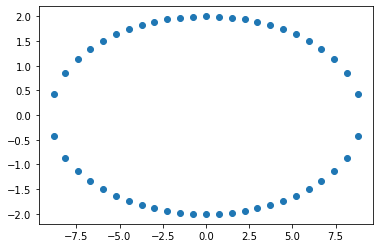

In [ ]:
# visualize X and Y before adding outliers
plt.scatter(X, Y)

In [ ]:
# define function to plot regression hyperplane (with reference to code used in Part 1)
# ref: https://stackoverflow.com/questions/59367939/how-to-correct-the-position-of-hyper-plane-in-python
# ref: https://stackoverflow.com/questions/58142905/how-to-plot-svm-hyperplane-with-only-one-feature

def reg_plot(X,Y,outlier,alpha):
  '''
  For each iteration (based on no. of outlier points):
  1. For given X and Y arrays, add a outlier and create scatter plot (note: outlier parameter is a list containing tuples of outlier points, where first element of tuple is for X and second element is for Y)
  2. Apply linear regression on X and Y for a given alpha (hyperparameter), and plot regression hyperplane
  '''
  plt.figure(figsize=(20,5))
  # X_t = X.copy()
  # Y_t = Y.copy()

  for j,i in enumerate(outlier): # loop with counter (count of current iter, value of item of current iter)
    plt.subplot(1, 5, j+1)
    X = np.append(X,[i[0]], axis=0) # add outlier to dataset for each iteration
    Y = np.append(Y,[i[1]], axis=0)
    plt.scatter(X, Y, color='black')
    plt.title('No of outliers:' + str(j+1))
    
    reg = SGDRegressor(alpha=alpha, eta0=0.001, learning_rate='constant',random_state=0) # initialize linear regression
    reg.fit(X.reshape(-1, 1),Y.reshape(-1, 1)) # reshape as X has 1 feature
    y_pred = reg.predict(X.reshape(-1, 1)) # need predicted y for plot(X,y)
    plt.plot(X,y_pred)

  plt.suptitle('Linear Regression Hyperplane For Alpha = ' + str(alpha), fontweight='bold')
  plt.show()

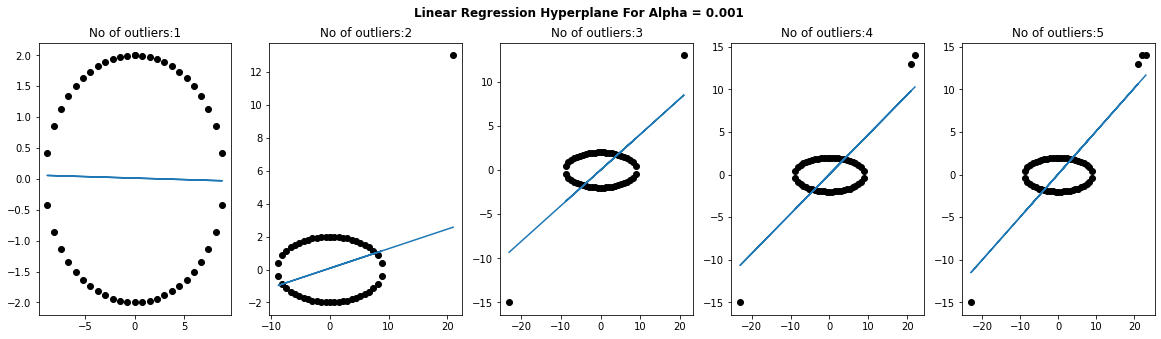

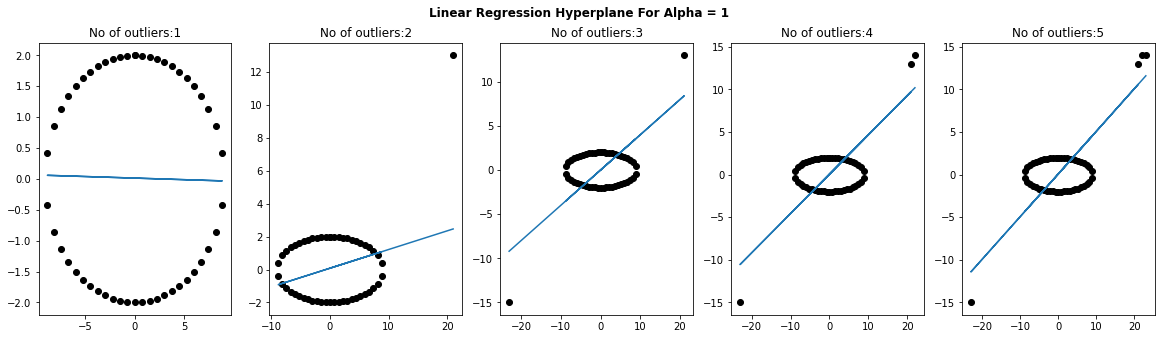

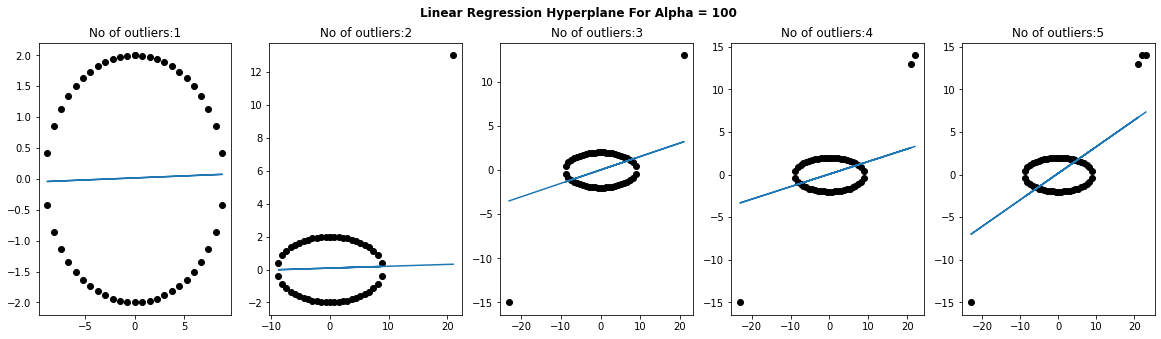

In [ ]:
outlier =  [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]
reg_plot(X,Y,outlier,0.001)
reg_plot(X,Y,outlier,1)
reg_plot(X,Y,outlier,100)

>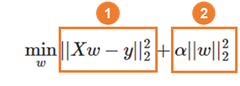
<br>Linear regression with L2 regularization (Ridge regression) solves the above optimization problem, where we are trying to minimize the penalized residual sum of squares. The first component is the square loss, which is the sum of squares between the observed targets and predicted targets. The second component is the regularization term, which imposes a penalty on the size of the coefficients. The objective of linear regression is to find an optimal hyperplane that minimizes the square loss, i.e. the predicted value is close to the observed value. This means the mininum value of the loss term is 0 when the coefficients tend to infinity. Without the regularization term, there is a tendency to overfit when solving the optimization problem. Thus, alpha ($α$) controls the amount of shrinkage on coefficients and acts as the regularization parameter. Observations on plots above:
1. With a small alpha (weak regularization), a stronger emphasis is placed on minimizing the loss term. This means miniziming the residual sum of squares becomes more important, leading to a higher tendency for the model to overfit. For the plots with alpha=0.001 and alpha=1, when the second outlier point is added, the hyperplane visibly arched upwards towards the outlier, when compared to alpha=100. When the third outlier point is added, the slope of the hyperplane increased further to accommodate the outliers. For alpha=0.001 and 1, it is likely the model is overfitting as the hyperplane is visibly angled towards the outliers.
2. With a large alpha (strong regularization), a stronger emphasis is placed on the regularization component where the coefficients are shrinked more, leading to a higher tendency for the model to underfit. For the plots with alpha=100, when the second outlier point is added onwards, the slope of the hyperplane did not increase as much when compared to smaller alpha. It appears that the model is optimal at alpha=100.
3. As the given dataset is not linear to begin with, the hyperplane produced by linear regression does not fit the data particularly well. In addition, linear regression is sensitive to outliers as outliers can have a strong influence on the square loss. From the plots above, if outliers in the data cannot be removed, a non-trivial value of alpha (e.g. C>1) can produce a hyperplane that minimizes the tendency of the model to overfit to the noise in the data.

References: 
1. [sklearn linear regression mathematical formulation](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)

<h3>Part 4: Effect of Collinear Features on Linear Models</h3>

1. Plot correlation heatmap of features.
2. Apply Logistic Regression and Linear SVM, and perform perturbation test to check presence/effect of collinearity.

Perturbation involves adding a small noise (usually to the training data but sometimes to the learnt parameters). If the weights generated by the model change significantly, features are collinear.

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/task_d.csv')

In [ ]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [ ]:
data.groupby('target').size() # balanced dataset

target
0    50
1    50
dtype: int64

In [ ]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values
print(X.shape)
print(Y.shape)

(100, 7)
(100,)


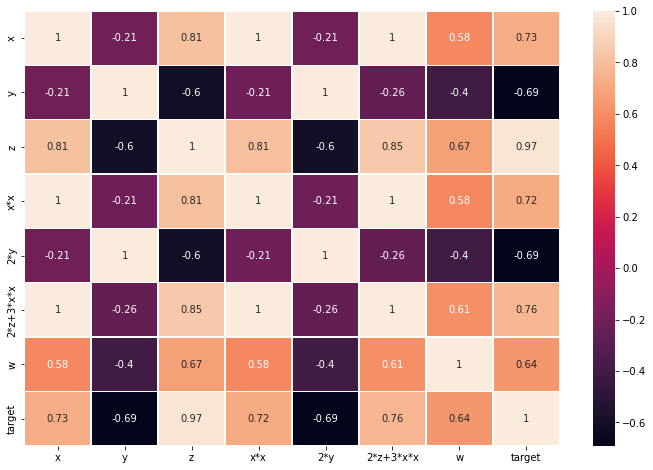

In [ ]:
plt.figure(figsize=(12, 8))
correlation = data.corr()
ax = sns.heatmap(correlation, annot=True, linewidths=.5)

>The following observations on the features can be made:
1. x is perfectly correlated with x*x, 2z+3xx.
2. y is perfectly correlated with 2y.
3. z has strong positive correlation with x, x*x, 2z+3xx.

Logistic Regression

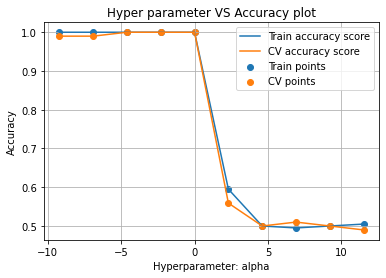

In [ ]:
# perform RandomizedSearchCV to find the best hyperparameter alpha (regularization)
parameters = {'alpha':np.logspace(-4, 5, 10)}
log_reg = SGDClassifier(loss='log')
clf = RandomizedSearchCV(log_reg, parameters, cv=3, scoring='accuracy', return_train_score=True, random_state=50)
clf.fit(X,Y)

results = pd.DataFrame.from_dict(clf.cv_results_) #cv_results_ returns dict of metrics/details on Random Search CV
results = results.sort_values(['param_alpha'])

train_acc = results['mean_train_score']
# train_auc_std = results['std_train_score']
cv_acc = results['mean_test_score'] 
# cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']

plt.plot(np.log(alpha.astype(float)), train_acc, label='Train accuracy score') # reference: https://stackoverflow.com/questions/59297543/why-do-i-get-the-loop-of-ufunc-does-not-support-argument-0-of-type-int-error-f
plt.plot(np.log(alpha.astype(float)), cv_acc, label='CV accuracy score')

plt.scatter(np.log(alpha.astype(float)), train_acc, label='Train points')
plt.scatter(np.log(alpha.astype(float)), cv_acc, label='CV points')

plt.legend()
plt.xlabel("Hyperparameter: alpha")
plt.ylabel("Accuracy")
plt.title("Hyper parameter VS Accuracy plot")
plt.grid()
plt.show()

In [ ]:
results['mean_train_score'] - results['mean_test_score'] # best hyperparameter is index 2,3,4,6,8 (alpha = 0.01,0.1,1,100,10000) - let's go with alpha = 100

0    0.010101
1    0.010101
2    0.000000
3    0.000000
4    0.000000
5    0.035934
6    0.000000
7   -0.015076
8    0.000000
9    0.015076
dtype: float64

In [ ]:
best_alpha = 100
best_model = SGDClassifier(loss='log', alpha=best_alpha, random_state=50)
best_model.fit(X, Y)

SGDClassifier(alpha=100, loss='log', random_state=50)

In [ ]:
y_pred = best_model.predict(X)
print('The accuracy for best model is {}'.format(accuracy_score(Y, y_pred)))

The accuracy for best model is 0.5


In [ ]:
# obtain weight values
weights = best_model.coef_[0]
abs_weights = np.abs(weights)

# get index of weights by desc order
sorted_index = np.argsort(abs_weights)[::-1] # [::-1] reverses the array returned by argsort() to desc order

# check feature importance
# print(np.array(data.columns)[sorted_index])
# print(abs_weights[sorted_index])
for p,q in zip(np.array(data.columns)[sorted_index], abs_weights[sorted_index]): # generate tuples for each element
  print('{:10}:{}'.format(p,q))

z         :0.004806711461675354
2*z+3*x*x :0.0037834132339441325
x         :0.003602363176272533
x*x       :0.0035589506548166596
2*y       :0.0034209360791649644
y         :0.0034209360791649644
w         :0.0031750723541721622


In [ ]:
# perturbation: add noise (order of 10^-2) to each element of X 
X_n = X + 10**(-2)
print(X_n.shape)

(100, 7)


In [ ]:
best_model_edited = SGDClassifier(loss='log', alpha=best_alpha, random_state=50)
best_model_edited.fit(X_n, Y)

SGDClassifier(alpha=100, loss='log', random_state=50)

In [ ]:
y_pred_n = best_model_edited.predict(X_n)
print('The accuracy for best model edited is {}'.format(accuracy_score(Y, y_pred_n)))

The accuracy for best model is 0.5


In [ ]:
# obtain weight values
weights_n = best_model_edited.coef_[0]
abs_weights_n = np.abs(weights_n)

# get index of weights by desc order
sorted_index_n = np.argsort(abs_weights_n)[::-1] # [::-1] reverses the array returned by argsort() to desc order

# check feature importance
for p,q in zip(np.array(data.columns)[sorted_index_n], abs_weights_n[sorted_index_n]): # generate tuples for each element
  print('{:10}:{}'.format(p,q))

z         :0.004810471219375773
2*z+3*x*x :0.0037871636588391595
x         :0.003606113277374291
x*x       :0.0035627005640074564
2*y       :0.0034171639127638467
y         :0.0034171639127638467
w         :0.003178831999450022


In [ ]:
# calculate % change between weights (before and after adding noise)
change = np.abs((abs_weights - abs_weights_n)/abs_weights) * 100

# get index of change in weights by desc order and filter to top 4
sorted_index_c = np.argsort(change)[::-1][:4] # [::-1] reverses the array returned by argsort() to desc order and [:n] gives that top n elements

for p,q in zip(np.array(data.columns)[sorted_index_c], change[sorted_index_c]): # generate tuples for each element
  print('{:5}:{:.3f}%'.format(p,q))

w    :0.118%
2*y  :0.110%
y    :0.110%
x*x  :0.105%


> As logistic regression assumes features are independent, this allows the use and interpretation of weights for feature importance. In this case, features are collinear, rendering weights less reliable. Overall, the change in weights after adding noise to the data is less than expected (less than 1% per feature - this may be due to the use of strong regularization from high alpha value, causing the model to underfit and penalising large weight coefficients, thus any difference in small-value weights is minimal). w, 2y, y and x*x have the highest change in weights, highlighting the presence of collinear features. From the correlation heatmap, y is perfectly correlated with 2y, and these features are the top 3 in terms of change in weights.

Linear SVM

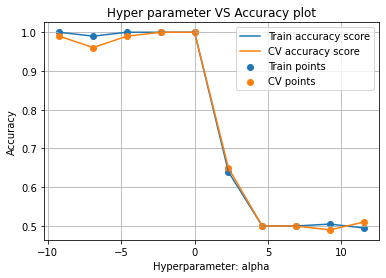

In [ ]:
# perform RandomizedSearchCV to find the best hyperparameter alpha (regularization)
parameters = {'alpha':np.logspace(-4, 5, 10)}
linear_svm = SGDClassifier(loss='hinge')
clf = RandomizedSearchCV(linear_svm, parameters, cv=3, scoring='accuracy', return_train_score=True, random_state=50)
clf.fit(X,Y)

results = pd.DataFrame.from_dict(clf.cv_results_) #cv_results_ returns dict of metrics/details on Random Search CV
results = results.sort_values(['param_alpha'])

train_acc = results['mean_train_score']
# train_auc_std = results['std_train_score']
cv_acc = results['mean_test_score'] 
# cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']

plt.plot(np.log(alpha.astype(float)), train_acc, label='Train accuracy score') # reference: https://stackoverflow.com/questions/59297543/why-do-i-get-the-loop-of-ufunc-does-not-support-argument-0-of-type-int-error-f
plt.plot(np.log(alpha.astype(float)), cv_acc, label='CV accuracy score')

plt.scatter(np.log(alpha.astype(float)), train_acc, label='Train points')
plt.scatter(np.log(alpha.astype(float)), cv_acc, label='CV points')

plt.legend()
plt.xlabel("Hyperparameter: alpha")
plt.ylabel("Accuracy")
plt.title("Hyper parameter VS Accuracy plot")
plt.grid()
plt.show()

In [ ]:
results['mean_train_score'] - results['mean_test_score'] # best hyperparameter is index 3,4,6,7 (alpha = 0.1,1,100,1000) - let's go with alpha=0.1

0    0.010101
1    0.029412
2    0.010101
3    0.000000
4    0.000000
5   -0.010199
6    0.000000
7    0.000000
8    0.015076
9   -0.015076
dtype: float64

In [ ]:
best_alpha = 0.1
best_model = SGDClassifier(loss='hinge', alpha=best_alpha, random_state=50)
best_model.fit(X, Y)

SGDClassifier(alpha=0.1, random_state=50)

In [ ]:
y_pred = best_model.predict(X)
print('The accuracy for best model is {}'.format(accuracy_score(Y, y_pred)))

The accuracy for best model is 1.0


In [ ]:
# obtain weight values
weights = best_model.coef_[0]
abs_weights = np.abs(weights)

# get index of weights by desc order
sorted_index = np.argsort(abs_weights)[::-1] # [::-1] reverses the array returned by argsort() to desc order

# check feature importance
# print(np.array(data.columns)[sorted_index])
# print(abs_weights[sorted_index])
for p,q in zip(np.array(data.columns)[sorted_index], abs_weights[sorted_index]): # generate tuples for each element
  print('{:10}:{}'.format(p,q))

z         :0.6803692103547816
2*y       :0.29828456772574985
y         :0.29828456772574985
2*z+3*x*x :0.25339064939125416
x         :0.21190107396200966
x*x       :0.19027381906446644
w         :0.08375143433392858


In [ ]:
# pertubation
best_model_edited = SGDClassifier(loss='hinge', alpha=best_alpha, random_state=50)
best_model_edited.fit(X_n, Y)

SGDClassifier(alpha=0.1, random_state=50)

In [ ]:
y_pred_n = best_model_edited.predict(X_n)
print('The accuracy for best model edited is {}'.format(accuracy_score(Y, y_pred_n)))

The accuracy for best model is 1.0


In [ ]:
# obtain weight values
weights_n = best_model_edited.coef_[0]
abs_weights_n = np.abs(weights_n)

# get index of weights by desc order
sorted_index_n = np.argsort(abs_weights_n)[::-1] # [::-1] reverses the array returned by argsort() to desc order

# check feature importance
for p,q in zip(np.array(data.columns)[sorted_index_n], abs_weights_n[sorted_index_n]): # generate tuples for each element
  print('{:10}:{}'.format(p,q))

z         :0.6749484351860389
2*y       :0.3092801456698379
y         :0.3092801456698379
2*z+3*x*x :0.22926083952068646
x         :0.18653651751134884
x*x       :0.16421328075360211
w         :0.08747467842557557


In [ ]:
# calculate % change between weights
change = np.abs((abs_weights - abs_weights_n)/abs_weights) * 100

# get index of change in weights by desc order and filter to top 4
sorted_index_c = np.argsort(change)[::-1][:4] # [::-1] reverses the array returned by argsort() to desc order and [:n] gives that top n elements

for p,q in zip(np.array(data.columns)[sorted_index_c], change[sorted_index_c]): # generate tuples for each element
  print('{:10}:{:.3f}%'.format(p,q))

x*x       :13.696%
x         :11.970%
2*z+3*x*x :9.523%
w         :4.446%


>When features are collinear like above, weight values can change arbitrarily. As linear SVM is similar to logistic regression, it is also affected by multicollinearity. Overall, there is a non-trivial change in weights after adding noise to the data. x*x, x, 2z+3xx and w have the highest change in weights, highlighting the presence of collinear features. From the correlation heatmap, x is perfectly correlated with xx and 2z+3xx, and these features are the top 3 in terms of change in weights.